## Laboratorio 3
Stefano Aragoni, Carol Arevalo


-------
### Análisis Exploratorio:
- Describir las series de tiempo y visualizarlas

In [405]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from IPython.display import display
import warnings
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import itertools
import statsmodels.api as sm

Como primer paso, se importaron los diferentes datasets y se les asignó un nombre para poder trabajar con ellos. Se utilizó la función `read_csv` de la librería `pandas` para leer los archivos csv y convertirlos en dataframes.

In [406]:
# Cargar los datos
births = pd.read_csv("data/daily-total-female-births.csv", delimiter=",")
car = pd.read_csv("data/monthly-car-sales.csv", delimiter=",")
temperature = pd.read_csv("data/monthly-mean-temp.csv", delimiter=",")
shampoo = pd.read_csv('data/shampoo.csv', delimiter=",")

metrics = {}

Posteriormente, se utilizó la librería `MinMaxScaler` para normalizar los datos de cada dataset. Esto se hizo para poder comparar las series de tiempo de manera más sencilla.

In [407]:
scaler = MinMaxScaler()
scaler.fit(births[['Births']])
births['Births'] = scaler.transform(births[['Births']])

scaler = MinMaxScaler()
scaler.fit(car[['Sales']])
car['Sales'] = scaler.transform(car[['Sales']])

scaler = MinMaxScaler()
scaler.fit(temperature[['Temperature']])
temperature['Temperature'] = scaler.transform(temperature[['Temperature']])

scaler = MinMaxScaler()
scaler.fit(shampoo[['Sales']])
shampoo['Sales'] = scaler.transform(shampoo[['Sales']])

Posteriormente, quiso analizar el contenido de los diferentes datasets. A continuación se presentan las 15 primeras columnas de cada uno de ellos. 

- Como se puede observar, el dataset de *shampoo* usa un formato de fecha diferente. Donde el año es representado por un número de un digito. Como resultado, se debe cambiar el formato de la fecha para poder trabajar con ella.

In [408]:
pd.concat([births.head(15), car.head(15), temperature.head(15), shampoo.head(15)], axis=1)

,Date,Births,Month,Sales,Month,Temperature,Month,Sales
0,1959-01-01,0.24,1960-01,0.047830,1920-01,0.264205,1-01,0.260707
1,1959-01-02,0.18,1960-02,0.153914,1920-02,0.269886,1-02,0.047272
2,1959-01-03,0.14,1960-03,0.314549,1920-03,0.372159,1-03,0.113382
3,1959-01-04,0.16,1960-04,0.429935,1920-04,0.437500,1-04,0.000000
4,1959-01-05,0.42,1960-05,0.439287,1920-05,0.647727,1-05,0.108406
5,1959-01-06,0.12,1960-06,0.400516,1920-06,0.772727,1-06,0.087436
6,1959-01-07,0.44,1960-07,0.191418,1920-07,0.750000,1-07,0.199929
7,1959-01-08,0.40,1960-08,0.130680,1920-08,0.713068,1-08,0.186956
8,1959-01-09,0.30,1960-09,0.072135,1920-09,0.653409,1-09,0.130620
9,1959-01-10,0.08,1960-10,0.193707,1920-10,0.545455,1-10,0.006398


Para solucionar este problema, se cambio el formato de la fecha a un formato de fecha estándar. Para esto, se utilizó la función `apply` de la librería `pandas` para aplicar una función a cada elemento de la columna. En este caso, se utilizó la función `lambda` para aplicar modificar el contenido de cada elemento de la columna.

In [409]:
# Convertir month de shampoo a fecha
shampoo['Month'] = shampoo['Month'].apply(lambda x: ("200"+x.split('-')[0]) + '-' + x.split('-')[1])

shampoo.head(5)

,Month,Sales
0,2001-01,0.260707
1,2001-02,0.047272
2,2001-03,0.113382
3,2001-04,0.000000
4,2001-05,0.108406


Posteriormente, se graficaron las series de tiempo para poder visualizarlas. Para esto, se utilizó la función `plot` de la librería `matplotlib`.

In [410]:
# Cargar la serie de tiempo
ts_births = TimeSeries.from_dataframe(births, 'Date', 'Births')
ts_car = TimeSeries.from_dataframe(car, 'Month', 'Sales')
ts_temperature = TimeSeries.from_dataframe(temperature, 'Month', 'Temperature')
ts_shampoo = TimeSeries.from_dataframe(shampoo, 'Month', 'Sales')

En el caso de la serie de tiempo de nacimientos totales diarios, se puede observar lo siguiente:
- La serie de tiempo tiene una tendencia relativamente estable. Sin embargo, en este caso solo se está analizando un único año, por tal razón, no se puede indicar con mayor precisión si a largo plazo hay un aumento en los nacimientos. 

- En el caso de estacionalidad, no se puede observar un patrón claro de estacionalidad.

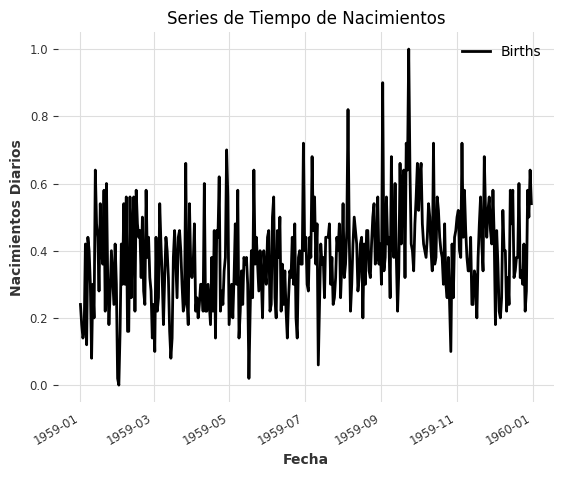

In [411]:
# Graficar la serie de tiempo
fig, ax = plt.subplots()
ts_births.plot(ax=ax)

ax.set_title("Series de Tiempo de Nacimientos")
ax.set_xlabel("Fecha")
ax.set_ylabel("Nacimientos Diarios")
plt.show()

En el caso de la serie de tiempo de ventas de carros mensuales, se puede observar lo siguiente:
- La serie de tiempo tiene una tendencia ascendente. A pesar de que hay sube y baja en las ventas, se puede observar que a largo plazo hay un aumento en las ventas de carros. Esto debido a que, claramente, cada vez hay más carros en las calles.

- En el caso de estacionalidad, se puede observar que la primera mitad del año hay un aumento en las ventas de carros y en la segunda mitad del año hay un descenso en las ventas de carros. Sin embargo, en la segunda mitad del año, específicamente a principios del 4to trimestre, se puede observar un aumento leve en las ventas de carros.

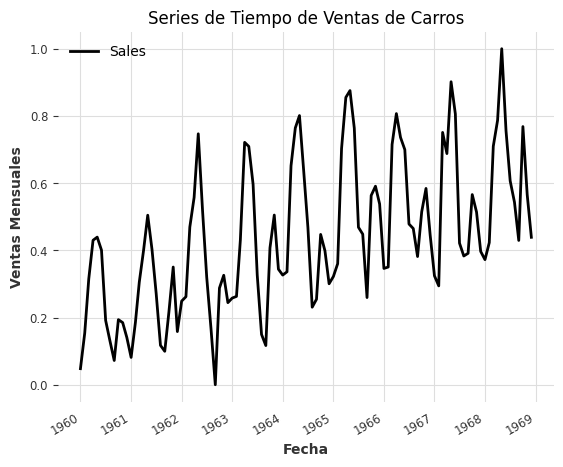

In [412]:
# Graficar la serie de tiempo
fig, ax = plt.subplots()
ts_car.plot(ax=ax)

ax.set_title("Series de Tiempo de Ventas de Carros")
ax.set_xlabel("Fecha")
ax.set_ylabel("Ventas Mensuales")
plt.show()

En el caso de la serie de tiempo de  temperaturas promedio mensuales, se puede observar lo siguiente:
- La serie de tiempo no tiene tendencia. Es decir, que de los años 1920 a 1940 no hay un cambio significativo en la temperatura promedio. 

- En el caso de estacionalidad, se puede observar que hay un aumento en la temperatura promedio en los meses de verano y un descenso en los meses de invierno. Este representando un patrón, el más obvio incluso, de estacionalidad. 

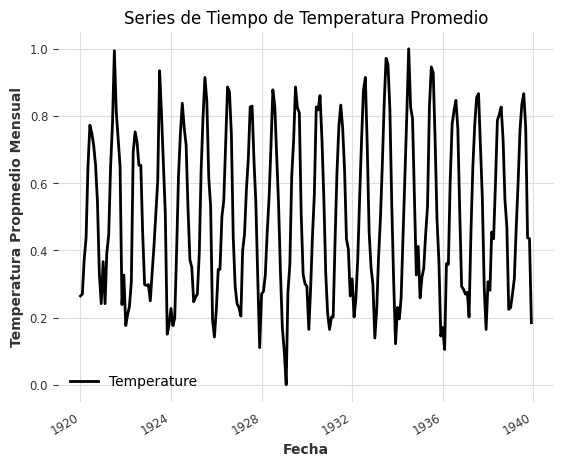

In [413]:
# Graficar la serie de tiempo
fig, ax = plt.subplots()
ts_temperature.plot(ax=ax)

ax.set_title("Series de Tiempo de Temperatura Promedio")
ax.set_xlabel("Fecha")
ax.set_ylabel("Temperatura Propmedio Mensual")
plt.show()

En el caso de la serie de tiempo de ventas de shampoo mensuales, se puede observar lo siguiente:
- La serie de tiempo tiene una tendencia ascendente. Esto debido a que se puede observar que hay un aumento en las ventas de shampoo a lo largo del tiempo.

- En el caso de estacionalidad, no se puede observar un patrón claro de estacionalidad. Sin embargo, se puede observar que en ciertos meses (alrededor de septiembre) hay un aumento en las ventas de shampoo.

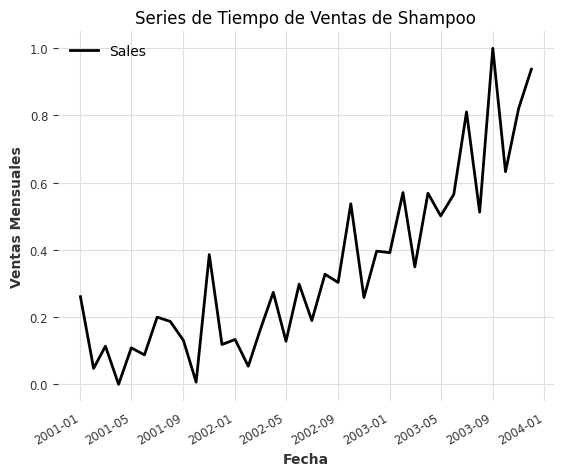

In [414]:
# Graficar la serie de tiempo
fig, ax = plt.subplots()
ts_shampoo.plot(ax=ax)

ax.set_title("Series de Tiempo de Ventas de Shampoo")
ax.set_xlabel("Fecha")
ax.set_ylabel("Ventas Mensuales")
plt.show()

-------
### Promedios
- Aplicar métodos de promedios y comparar los resultados con el conjunto original

Posteriormente, se generó una función para aplicar los métodos de promedios (Naive Moving Average, y Naive Mean). Se calculó el error de cada una de las predicciones. 

Naive Mean: This model has no parameter, and always predicts the mean value of the training series.

Naive Drift: This model fits a line between the first and last point of the training series, and extends it in the future.

In [415]:
from darts.models import NaiveMovingAverage, NaiveMean
from darts.metrics import rmse, mae, mape

def promedios(ts, text, N=0):
    N = int(len(ts)*0.1)
    train, val = ts[:-N], ts[-N:]
    
    metrics[text] = {}

    # Crear el modelo NaiveMovingAverage
    model = NaiveMovingAverage()
    model.fit(train)
    prediction = model.predict(len(val)) 

    # Crear el modelo NaiveMean
    model2 = NaiveMean()
    model2.fit(train)
    prediction2 = model2.predict(len(val))

    # Error 
    rmse_score = rmse(val, prediction)
    mae_score = mae(val, prediction)
    print("RMSE (NaiveMovingAverage):", rmse_score)
    print("MAE (NaiveMovingAverage):", mae_score)
    metrics[text]["NaiveMovingAverage"] = [rmse_score, mae_score]

    rmse_score2 = rmse(val, prediction2)
    mae_score2 = mae(val, prediction2)
    print("\nRMSE (NaiveMean):", rmse_score2)
    print("MAE (NaiveMean):", mae_score2)
    metrics[text]["NaiveMean"] = [rmse_score2, mae_score2]

    # Crear la gráfica de serie de tiempo
    fig, ax = plt.subplots()
    ts.plot(label='Actual', ax=ax)
    prediction.plot(label='NaiveMovingAverage', ax=ax)
    prediction2.plot(label='NaiveMean', ax=ax)

    ax.set_title(text)
    ax.set_xlabel("Fecha")
    ax.legend()
    plt.show()


En el caso de la serie de tiempo de nacimientos totales diarios, se puede observar lo siguiente:

- Las métricas de RMSE y MAE indican que el método de NaiveMean es mejor que el método de  NaiveMovingAverage. Sin embargo, ambos métodos presentaron errores muy similares. 

- Este tipo de método es útil cuando se quiere predecir un valor en el futuro cercano. Sin embargo, no es útil cuando se quiere predecir un valor en el futuro lejano. Esto debido a que, como se puede observar en la gráfica, los métodos predicen un valor constante para todos los valores futuros.

RMSE (NaiveMovingAverage): 0.13498971154211062
MAE (NaiveMovingAverage): 0.11555555555555556

RMSE (NaiveMean): 0.13310423680539488
MAE (NaiveMean): 0.11273893954745022


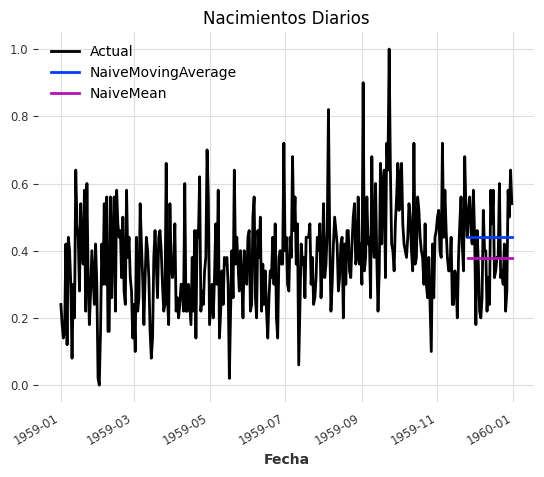

In [416]:
promedios(ts_births, "Nacimientos Diarios")

En el caso de la serie de tiempo de ventas de carros, se puede observar lo siguiente:
- El NaiveMovingAverage, debido a su funcionamiento, predice en base al promedio de los últimos valores. Por otro lado, el NaiveMean predice en base al promedio de todos los datos históricos. 

- En este caso, ambos tienen un error muy similar. Sin embargo, el NaiveMovingAverage tiene un error menor. debido a que se acopla más a la tendencia ascendente de la serie.

- Nuevamente, este tipo de método retorna una serie de predicciones constantes. Por lo que, no es útil cuando se quiere predecir un valor en el futuro lejano.

RMSE (NaiveMovingAverage): 0.290988637419809
MAE (NaiveMovingAverage): 0.23752861526472172

RMSE (NaiveMean): 0.29571472420446754
MAE (NaiveMean): 0.2432954049575605


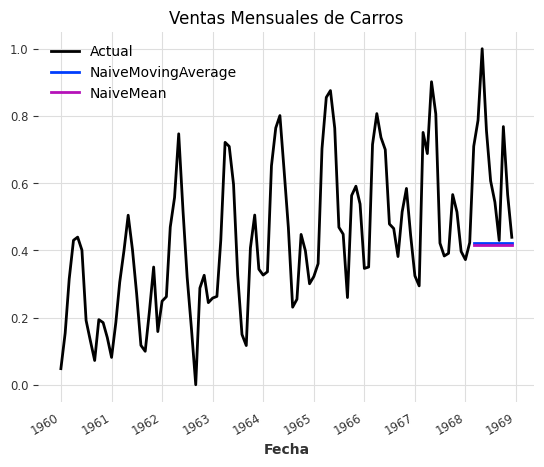

In [417]:
promedios(ts_car, "Ventas Mensuales de Carros")

En el caso de la serie de tiempo de temperatura promedio mensual, se puede observar lo siguiente:
- El NaiveMean sacó un error promedio más bajo de RMSE y MAE. El presente dataset no presenta tendencia, por lo cual los datos son estables. Como resultado, el NaiveMean logró predecir los futuros valores justo a la mitad.

- El modelo NaiveMovingAverage toma en consideración los últimos datos históricos. Ya que en este caso aparentemente hay más valores bajos que altos, el modelo predice valores bajos para todo el futuro.

RMSE (NaiveMovingAverage): 0.4232533472548865
MAE (NaiveMovingAverage): 0.36174242424242414

RMSE (NaiveMean): 0.2211581922429461
MAE (NaiveMean): 0.1921241494809203


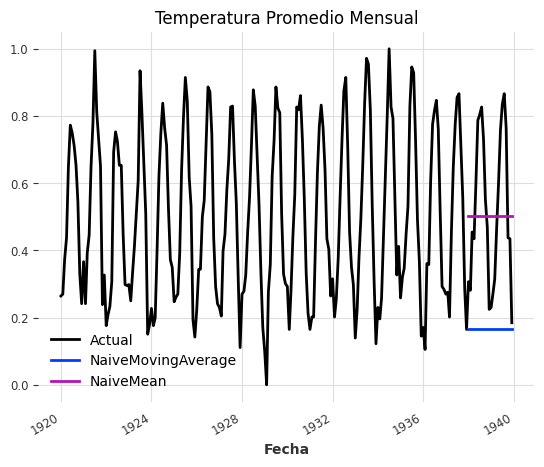

In [418]:
promedios(ts_temperature, "Temperatura Promedio Mensual")

En el caso de las ventas mensuales de shampoo, se puede observar lo siguiente:
- Debido a que el dataset presenta una tendencia ascendente, el método de Naive Mean no funcionó adecuadamente. Nuevamente, este método promedia todos los valores históricos, por lo cual no es capaz de seguir la última tendencia de los datos. 

- NaiveMovingAverage presentó muchísimo menos error debido a que sí fue capaz de detectar el último patrón y continuar con esa tendencia.

RMSE (NaiveMovingAverage): 0.23864405162647742
MAE (NaiveMovingAverage): 0.2028908240033174

RMSE (NaiveMean): 0.5105243884688203
MAE (NaiveMean): 0.49482204307155436


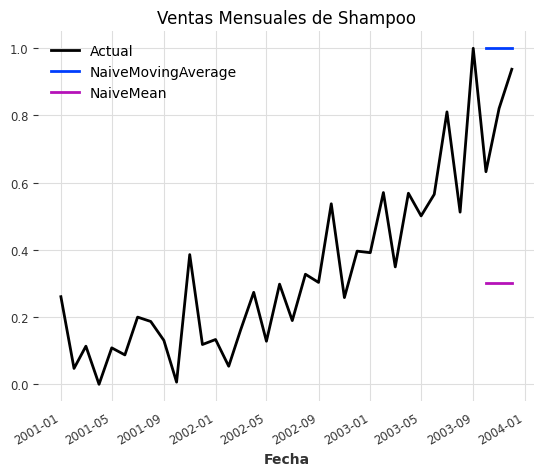

In [419]:
promedios(ts_shampoo, "Ventas Mensuales de Shampoo")

------
### SARIMA
- Identificar parámetros y ajustar un modelo SARIMA

Posteriormente, se generó una función para aplicar el método de SARIMA. Se calculó el error de cada una de las predicciones. 

In [441]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

def sarima(ts, text, N=0, fre=12):
    N = int(len(ts)*0.10)
    train, val = ts[:-N], ts[-N:]

    # GridSearch CV
    p_values = [0, 1, 2]
    d_values = [0, 1]
    q_values = [0, 1]
    P_values = [0, 1]
    D_values = [0, 1]
    Q_values = [0, 1]
    s_values = [fre]

    warnings.filterwarnings("ignore")   # Ignora warnings de convervengia de GridSearch
    param_combinations = list(itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values, s_values))
    best_params = None
    best_aic = np.inf

    # GRID SEARCH PARA BUSCAR MEJORES PARAMETROS
    for params in param_combinations:
        p, d, q, P, D, Q, s = params
        
        try:
            sarima_model = sm.tsa.SARIMAX(train.values(), order=(p, d, q), seasonal_order=(P, D, Q, s), enforce_stationarity=False, enforce_invertibility=False)
            sarima_results = sarima_model.fit(disp=False, maxiter=100)
            
            aic = sarima_results.aic
            
            if aic < best_aic:
                best_aic = aic
                best_params = params
                
        except Exception as e:
            continue
    
    # Ajustar el modelo SARIMA con los mejores parámetros encontrados
    model_sarima = SARIMAX(train.values(), order=(best_params[0], best_params[1], best_params[2]), seasonal_order=(best_params[3], best_params[4], best_params[5], best_params[6]))
    model_sarima = model_sarima.fit(disp=False, maxiter=100)

    # Predecir los valores
    prediction = model_sarima.forecast(steps=len(val))

    # Calcular RMSE y MAE
    rmse_val = np.sqrt(np.mean((val.values() - prediction) ** 2))
    mae_val = np.mean(np.abs(val.values() - prediction))
    print('RMSE = {:.2f}'.format(rmse_val))
    print('MAE = {:.2f}'.format(mae_val))

    metrics[text]["Sarima"] = [rmse_val, mae_val]

    # Crear la gráfica de serie de tiempo
    fig, ax = plt.subplots()
    ts.plot(label='actual', ax=ax)
    ax.plot(val.time_index, prediction, label='forecast', color='orange')

    ax.set_title(text)
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Valor")
    ax.legend()
    plt.show()

En el caso de SARIMA con daily-total-female-births, se puede observar lo sigueinte:

- A través de GRID SEARCH, se logró encontrar los parámetros y ajustes que generaban el mejor modelo.

- Este dataset no presenta tendencia ni estacionalidad, por lo cual SARIMA (Seasonal Autoregressive Integrated Moving Average) no presenta gran ventaja para predecir valores. En realidad, generó un error similar a los métodos de promedios. 

RMSE = 0.13
MAE = 0.11


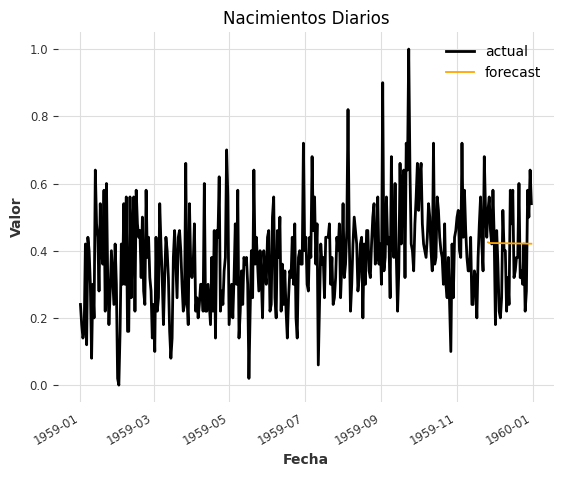

In [442]:
sarima(ts_births, "Nacimientos Diarios", 0)

En el caso de SARIMA con ventas mensuales de carros, se puede observar lo sigueinte:

- A través de GRID SEARCH, se logró encontrar los parámetros y ajustes que generaban el mejor modelo.

- Como se puede observar en la gráfica, este método presentó predicciones que más se acoplan a los valores reales. Asimismo, el error es menor al de los métodos de promedios. Sin embargo, cabe destacar que no se termina de acoplar 100% debido a patrones raros que pudo haber encontrado. Este método no es muy flexible.

RMSE = 0.24
MAE = 0.19


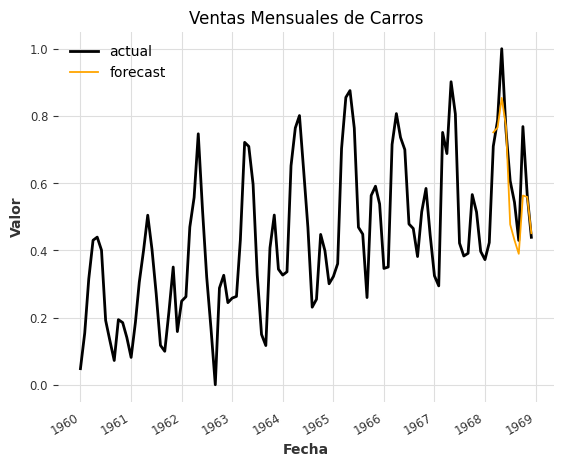

In [443]:
sarima(ts_car, "Ventas Mensuales de Carros", 12)

En el caso de SARIMA con las temperaturas promedio mensuales, se puede observar lo sigueinte:

- A través de GRID SEARCH, se logró encontrar los parámetros y ajustes que generaban el mejor modelo.

- Las predicciones generadas con el método de SARIMA se apegaron al patrón de la serie de tiempo original. Asimismo, presentó un error menor que con el método de Naive Moving Average, donde se tenía un RMSE de 0.42 y un MAE de 0.39.

- Este dataset funcionó mejor con SARIMA ya que presenta estacionalidad; elemento clave para usar SARIMA. Asimismo, ya que no presenta tendencia positiva ni negativa, fue más fácil para el modelo. 

RMSE = 0.33
MAE = 0.27


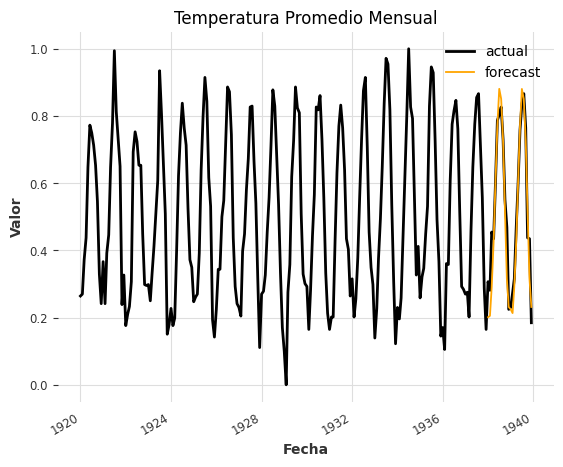

In [444]:
sarima(ts_temperature, "Temperatura Promedio Mensual", 12)

En el caso de SARIMA con las ventas mensuales de shampoo, se puede observar lo sigueinte:

- A través de GRID SEARCH, se logró encontrar los parámetros y ajustes que generaban el mejor modelo.

- El método de SARIMA generó error más bajo que con Naive Moving Average y Naive Mean. El modelo aparentemente encontró un tipo de estacionalidad, por lo cual quería bajar inmediatamente al final. Pero no era el caso. 

RMSE = 0.19
MAE = 0.16


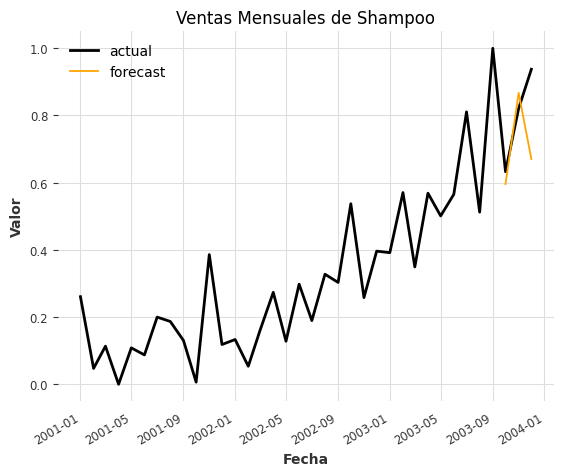

In [445]:
sarima(ts_shampoo, "Ventas Mensuales de Shampoo", 0)

-------
### Alisamiento Exponencial:
- Aplicar diferentes métodos de alisamiento exponencial y comparar.

Posteriormente, se generó una función para aplicar diferentes métodos de alisamiento exponencial (SINGLE, y holt-winters). Se calculó el error de cada una de las predicciones. 

In [446]:
from darts.models import ExponentialSmoothing
from darts.utils.utils import ModelMode, SeasonalityMode

def exponencial(ts, text, N=0):
    N = int(len(ts)*0.1)
    train, val = ts[:-N], ts[-N:]

    # Crear el modelo SIMPLE EXPONENTIAL SMOOTHING
    model = ExponentialSmoothing(
        trend= None,                    # NO hay tendencia
        seasonal=None,                  # No hay estacionalidad
    )
    model.fit(train)
    prediction = model.predict(len(val)) 

    # Crear el modelo HOLT WINTERS EXPONENTIAL SMOOTHING
    model2 = ExponentialSmoothing(
        trend= ModelMode.ADDITIVE,                  # Sí hay tendencia
        seasonal=SeasonalityMode.ADDITIVE           # Sí hay estacionalidad
        #seasonal_periods                           # Inferido automáticamente
    )
    model2.fit(train)
    prediction2 = model2.predict(len(val))

    # Error 
    rmse_score = rmse(val, prediction)
    mae_score = mae(val, prediction)
    print("RMSE (SingleExponentialSmoothing):", rmse_score)
    print("MAE (SingleExponentialSmoothing):", mae_score)
    metrics[text]["SingleExponentialSmoothing"] = [rmse_score, mae_score]

    rmse_score2 = rmse(val, prediction2)
    mae_score2 = mae(val, prediction2)
    print("\nRMSE (HoltWintersExponentialSmoothing):", rmse_score2)
    print("MAE (HoltWintersExponentialSmoothing):", mae_score2)
    metrics[text]["HoltWintersExponentialSmoothing"] = [rmse_score2, mae_score2]

    # Crear la gráfica de serie de tiempo
    fig, ax = plt.subplots()
    ts.plot(label='Actual', ax=ax)
    prediction.plot(label='SingleExponentialSmoothing', ax=ax)
    prediction2.plot(label='HoltWintersExponentialSmoothing', ax=ax)

    ax.set_title(text)
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Valor")
    ax.legend()
    plt.show()

Con Alisamiento Exponencial se pudo observar lo siguiente:
- Ya que el conjunto de datos de Nacimientos Diarios no presenta tendencia ni estacionalidad, Holt Winters Exponential Smoothing no fue capaz de predecir de forma correcta los datos. Esto debido a que dicho modelo funciona de forma óptima si estas características están presentes.

- Cabe destacar que este modelo sacó resultados similares a los métodos de promedio.

RMSE (SingleExponentialSmoothing): 0.13157213483580166
MAE (SingleExponentialSmoothing): 0.11276190770500133

RMSE (HoltWintersExponentialSmoothing): 0.13239324279579945
MAE (HoltWintersExponentialSmoothing): 0.111953467725996


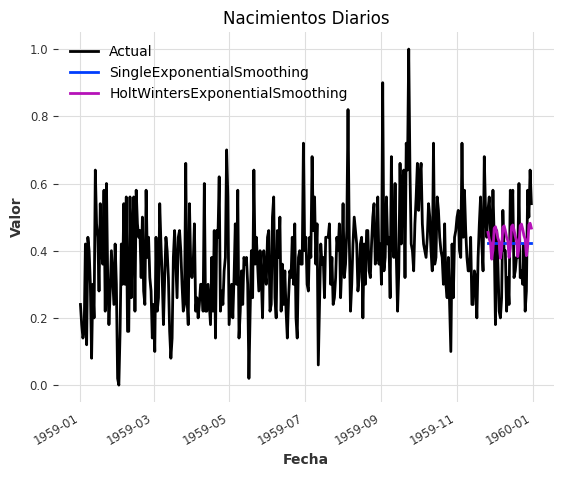

In [447]:
exponencial(ts_births, "Nacimientos Diarios")

Con Alisamiento Exponencial se pudo observar lo siguiente:
- El dataset de Ventas Mensuales de Carros sí presenta una tendencia positiva y estacionalidad (ventas más altas en la primera mitad de un año). Como resultado, el algoritmo de Holt Winters fue capaz de correctamente predecir los respectivos valores. En este caso, con un error casi nulo (0.09 de RMSE y 0.07 de MAE). Este método obtuvo el error más bajo para este dataset hasta el momento.

- En el caso de Single Exponential Smoothing, este no presentó tan buenos resultados debido a que el dataset presenta una tendencia y estacionalidad. Esta versión del método no funciona muy bien con estas características. 

RMSE (SingleExponentialSmoothing): 0.29098863803654695
MAE (SingleExponentialSmoothing): 0.23752861602026734

RMSE (HoltWintersExponentialSmoothing): 0.09426604363154363
MAE (HoltWintersExponentialSmoothing): 0.07154058340871014


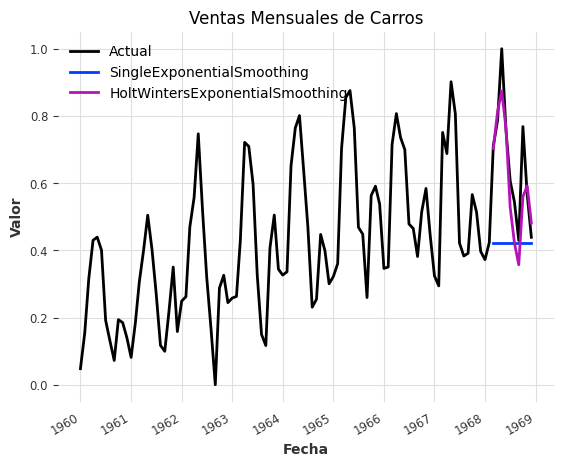

In [448]:
exponencial(ts_car, "Ventas Mensuales de Carros")

Con Alisamiento Exponencial se pudo observar lo siguiente:
- El dataset de Temoeratura Promedio Mensual sí presenta estacionalidad (estaciones climáticas del año). Por tal razón, el método de Holt Winters Exponential Smoothing fue capaz de adaptarse correctamente a los datos y predecir correctamente los valores futuros. En este caso, con un error casi nulo (0.061 de RMSE y 0.045 de MAE). Este método obtuvo el error más bajo para este dataset hasta el momento.

- Nuevamente, debido a que el dataset presenta estacionalidad, el método de Single Exponential Smoothing no logró obtener estos buenos resultados. 

RMSE (SingleExponentialSmoothing): 0.42325334569911804
MAE (SingleExponentialSmoothing): 0.3617424224221118

RMSE (HoltWintersExponentialSmoothing): 0.06194191418977301
MAE (HoltWintersExponentialSmoothing): 0.04576698995551673


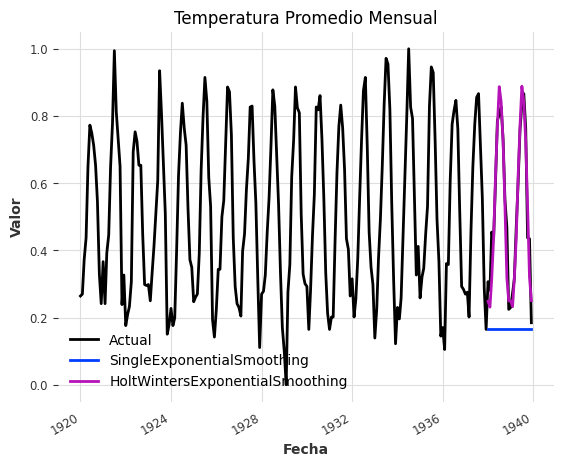

In [449]:
exponencial(ts_temperature, "Temperatura Promedio Mensual")

Con Alisamiento Exponencial se pudo observar lo siguiente:
- El dataset de Ventas Mensuales de Shampoo no tiene estacionalidad. Por tal razón, el método de Exponential Smoothing no presentó resultados tan buenos como en los otros datasets. Sin embargo, sí fue capaz de predecir los valores futuros de forma parecida a los métodos de promedio. 

RMSE (SingleExponentialSmoothing): 0.13419929520631046
MAE (SingleExponentialSmoothing): 0.12534693392840154

RMSE (HoltWintersExponentialSmoothing): 0.12495609638140333
MAE (HoltWintersExponentialSmoothing): 0.11402605473911898


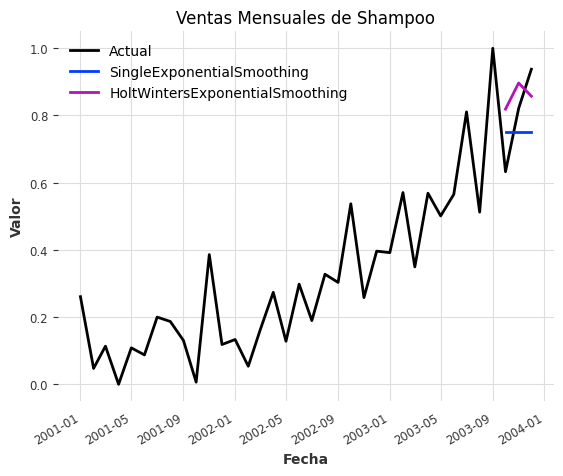

In [450]:
exponencial(ts_shampoo, "Ventas Mensuales de Shampoo")

---------
### Prophet
- Utilizar Prophet para modelar la serie de tiempo.

Nuevamente, se generó una función para aplicar el método de Prophet. Luego, se calculó el error de cada una de las predicciones. 

In [451]:
from darts.models.forecasting.prophet_model import Prophet

def prophet(ts, text, N=0):
    N = int(len(ts)*0.1)
    train, val = ts[:-N], ts[-N:]

    # Crear el modelo
    model = Prophet()

    # Entrenar el modelo
    model.fit(train)

    # Predecir los valores
    prediction = model.predict(len(val))

    # Error RMSE, MAE
    rmse_score = rmse(val, prediction)
    mae_score = mae(val, prediction)
    print("RMSE (Prophet):", rmse_score)
    print("MAE (Prophet):", mae_score)
    metrics[text]["Prophet"] = [rmse_score, mae_score]

    # Crear la gráfica de serie de tiempo
    fig, ax = plt.subplots()
    ts.plot(label='Actual', ax=ax)
    prediction.plot(label='Prediccion', ax=ax)

    ax.set_title(text)
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Valor")
    ax.legend()
    plt.show()

Al utilizar Prophet con el dataset de Nacimientos Diarios, se pudo observar lo siguiente:
- El método fue capaz de predecir los valores con cierto error. Sin embargo, Prophet funciona mejor cuando hay estacionalidad y tendencia. Por tal razón, el error era esperado. 

- El error es parecido al de Holt Winters Exponential Smoothing y los métodos de promedio

19:50:54 - cmdstanpy - INFO - Chain [1] start processing
19:50:54 - cmdstanpy - INFO - Chain [1] done processing


RMSE (Prophet): 0.14180231545753852
MAE (Prophet): 0.11925751010050635


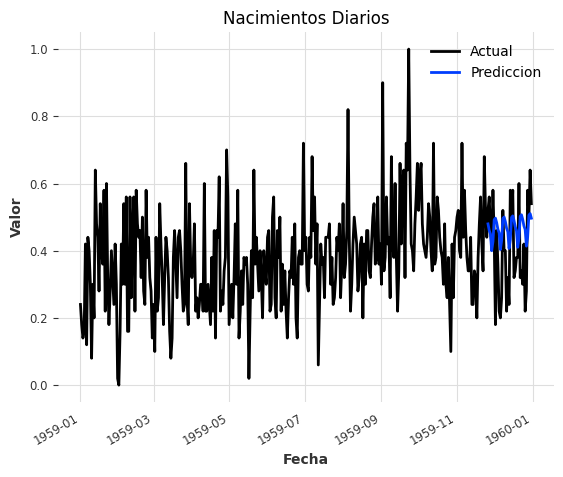

In [452]:
prophet(ts_births, "Nacimientos Diarios")

Al utilizar Prophet con el dataset de Ventas Mensuales de Carros, se pudo observar lo siguiente:
- Debido a que el dataset cuenta con estacionalidad y tendencia, este modelo fue capaz de predecir muy cercanamente los valores de ventas. Cabe destacar que con Holt Winters Exponential Smoothing se obtuvo un error más bajo. 

- Posiblemente Holt Winter presentó mejores resultados debido a los patrones irregularess vistos en la segunda mitad de cada año. Holt Winters es más flexible para adaptarse a estos patrones. 

19:50:55 - cmdstanpy - INFO - Chain [1] start processing
19:50:56 - cmdstanpy - INFO - Chain [1] done processing


RMSE (Prophet): 0.09565832916074825
MAE (Prophet): 0.07045093635639384


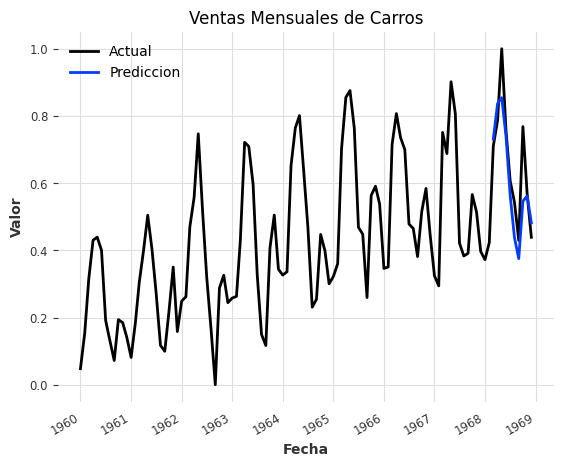

In [453]:
prophet(ts_car, "Ventas Mensuales de Carros")

Al utilizar Prophet con el dataset de Temperatura Promedio Mensual, se pudo observar lo siguiente:
- El algoritmo de Prophet sacó buenos resultados debido a que el presente dataset cuenta con estacionalidad. Sacó un error muy bajo, más bajo que el de Holt Winters Exponential Smoothing.

- Posiblemente la falta de tendencia permitió que el algoritmo pudiera predecir de forma más fácil.

19:50:57 - cmdstanpy - INFO - Chain [1] start processing


19:50:57 - cmdstanpy - INFO - Chain [1] done processing


RMSE (Prophet): 0.06107199649071499
MAE (Prophet): 0.04414574800415507


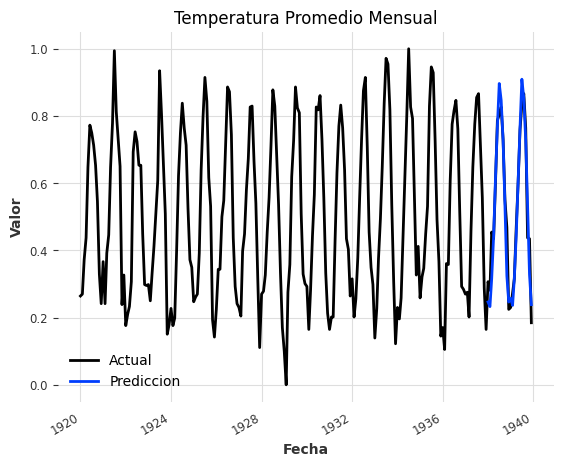

In [454]:
prophet(ts_temperature, "Temperatura Promedio Mensual")

Al utilizar Prophet con el dataset de Ventas Mensuales de Shampoo, se pudo observar lo siguiente:
- Se obtuvo un error muy grande debido a que el presente dataset no cuenta con estacionalidad. Por tal razón, el método no fue capaz de trabajar de manera óptima.

19:50:58 - cmdstanpy - INFO - Chain [1] start processing


19:50:58 - cmdstanpy - INFO - Chain [1] done processing


RMSE (Prophet): 0.4148539473230637
MAE (Prophet): 0.3332460603448523


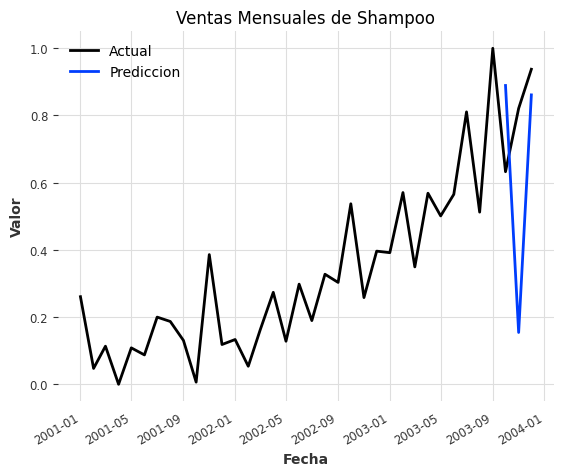

In [455]:
prophet(ts_shampoo, "Ventas Mensuales de Shampoo")

---------
### Redes Neuronales
- Implementar una red neuronal simple para prever la serie de tiempo

Finalmente, se generó una función para aplicar el método de Prophet. Nuevamente, se calculó el error de cada una de las predicciones. 

In [475]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def ffnn(ts, text, N=0, c=32, epochs=32, batch=4):
    N = int(len(ts) * 0.1)

    X_train, y_train = [], []

    # Crea las secuencias de entrada y salida
    for i in range(c, len(ts)):
        X_train.append(ts[i - c:i]) 
        y_train.append(ts[i]) 

    # Convierte las listas en matrices numpy
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Define el modelo de la FFNN
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(c,)),  # Aplana la entrada
        keras.layers.Dense(64, activation='relu'),  # Capa oculta con activación ReLU
        keras.layers.Dense(1)  # Capa de salida para predecir el siguiente valor
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch)
    predictions = model.predict(X_train)

    def rmse(y_true, y_pred):
        return np.sqrt(np.mean(np.square(y_true - y_pred)))

    def mae(y_true, y_pred):
        return np.mean(np.abs(y_true - y_pred))

    rmse_score = rmse(y_val, predictions)
    mae_score = mae(y_val, predictions)
    print("RMSE (FFNN):", rmse_score)
    print("MAE (FFNN):", mae_score)
    metrics[text]["FFNN"] = [rmse_score, mae_score]

    fig, ax = plt.subplots()
    ts.plot(label='Actual', ax=ax)
    prediction = pd.Series(predictions.flatten(), index=val.index)
    prediction.plot(label='Predicción', ax=ax)

    ax.set_title(text)
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Valor")
    ax.legend()
    plt.show()


In [474]:
ffnn(ts_births, "Nacimientos Diarios")

IndexError: The type of your index was not matched.


IndexError: The type of your index was not matched.

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 700   
4 | V             | Linear           | 26    
---------------------------------------------------
726       Trainable params
0         Non-trainable params
726       Total params
0.003     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=46` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

RMSE (LSTM): 0.14459959178803444
MAE (LSTM): 0.11392192947545285


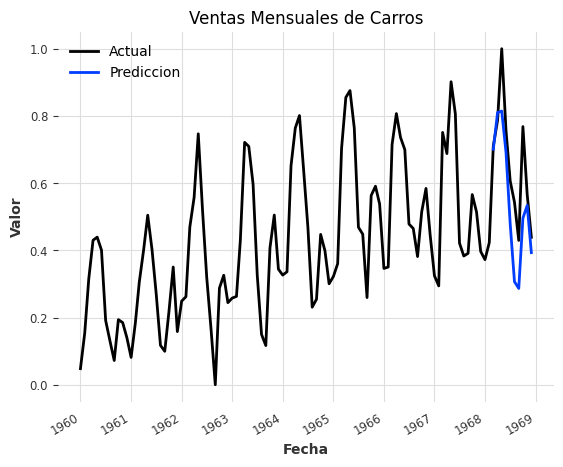

In [458]:
lstm(ts_car, "Ventas Mensuales de Carros", c=24, epochs=46, batch=2)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 700   
4 | V             | Linear           | 26    
---------------------------------------------------
726       Trainable params
0         Non-trainable params
726       Total params
0.003     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=16` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

RMSE (LSTM): 0.09322337777303433
MAE (LSTM): 0.07215724333288494


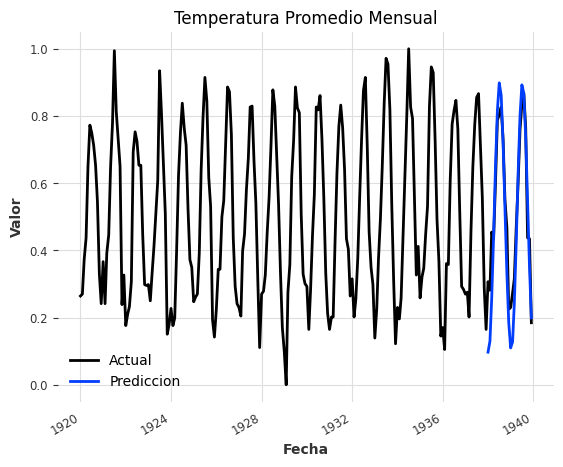

In [459]:
lstm(ts_temperature, "Temperatura Promedio Mensual", c=12, epochs=16, batch=4)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 700   
4 | V             | Linear           | 26    
---------------------------------------------------
726       Trainable params
0         Non-trainable params
726       Total params
0.003     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=200` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

RMSE (LSTM): 0.11927666023306571
MAE (LSTM): 0.08177265985711553


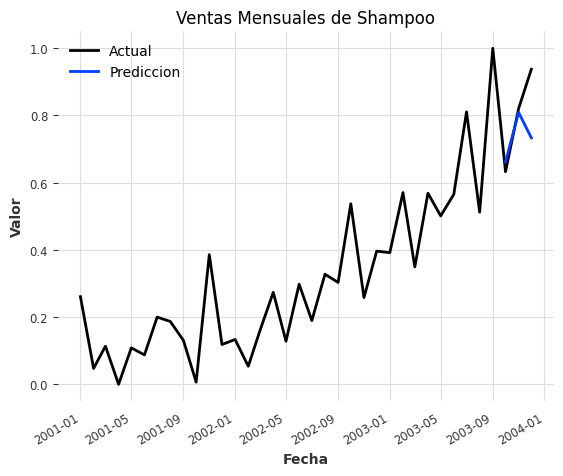

In [460]:
lstm(ts_shampoo, "Ventas Mensuales de Shampoo", c=28, epochs=200, batch=4)

--------
### Resultados

In [461]:
dfs = {}
for key, value in metrics.items():
    dfs[key] = pd.DataFrame(value).T
    dfs[key].columns = ['RMSE', 'MAE']

    #ordenar por RMSE y MAE
    dfs[key] = dfs[key].sort_values(by=['RMSE', 'MAE'])
    

for key, df in dfs.items():
    print(key)
    print(df)
    print()

Nacimientos Diarios
                                     RMSE       MAE
Sarima                           0.131400  0.112551
SingleExponentialSmoothing       0.131572  0.112762
LSTM                             0.131975  0.109769
HoltWintersExponentialSmoothing  0.132393  0.111953
NaiveMean                        0.133104  0.112739
NaiveMovingAverage               0.134990  0.115556
Prophet                          0.141802  0.119258

Ventas Mensuales de Carros
                                     RMSE       MAE
HoltWintersExponentialSmoothing  0.094266  0.071541
Prophet                          0.095658  0.070451
LSTM                             0.144600  0.113922
Sarima                           0.239666  0.191464
NaiveMovingAverage               0.290989  0.237529
SingleExponentialSmoothing       0.290989  0.237529
NaiveMean                        0.295715  0.243295

Temperatura Promedio Mensual
                                     RMSE       MAE
Prophet                          0.061